In [1]:
import os
import glob
import argparse
import matplotlib

# Keras / TensorFlow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '5'
from keras.models import load_model
from layers import BilinearUpSampling2D
from tensorflow.keras.layers import Layer, InputSpec
from utils import predict, load_images, display_images
from matplotlib import pyplot as plt

In [16]:
import cv2
import numpy as np

In [3]:
model_path = 'nyu.h5'
input_images_path = "examples/*.png"
# Custom object needed for inference and training
custom_objects = {'BilinearUpSampling2D': BilinearUpSampling2D, 'depth_loss_function': None}
print('Loading model...')

# Load model into GPU / CPU
model = load_model(model_path, custom_objects=custom_objects, compile=False)

Loading model...


In [4]:
inputs = load_images(glob.glob(input_images_path))

In [10]:
outputs = predict(model, inputs[:1])

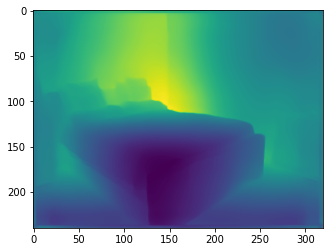

In [11]:
plt.imshow(outputs[0])

In [18]:
outputs[0].shape

(240, 320, 1)

In [21]:
frame.shape

(480, 640, 3)

In [17]:
# define a video capture object
vid = cv2.VideoCapture(0)
  
while(True):
      
    # Capture the video frame
    # by frame
    ret, frame = vid.read()
    outputs = predict(model, np.array([frame]))
    # Display the resulting frame
    cv2.imshow('frame', outputs[0])
      
    # the 'q' button is set as the
    # quitting button you may use any
    # desired button of your choice
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()